In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
class Config:
    TRAIN_PATH = '../inputs/train.csv'
    TEST_PATH = '../inputs/test.csv'
    TRAIN_LABELS = '../inputs/train_labels.csv'
    SAMPLE_SUBMISSION = '../inputs/sample_submission.csv'

In [7]:
train_df = pd.read_csv(Config.TRAIN_PATH)
test_df= pd.read_csv(Config.TEST_PATH)
train_labels = pd.read_csv(Config.TRAIN_LABELS)
sample_submission = pd.read_csv(Config.SAMPLE_SUBMISSION)

In [8]:
train_labels['question'] = train_labels['session_id'].str.split('q').str[-1].astype(int)
train_labels['session'] = train_labels['session_id'].str.split('_').str[0].astype(int)

OverflowError: Python int too large to convert to C long

In [10]:
test_df

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4,20090109393214576_0-4
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,20090312331414616,1001,1581679,map_hover,basic,22,NaN,NaN,NaN,NaN,...,484.0,NaN,tunic.wildlife,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,13-22,20090312331414616_13-22
3724,20090312331414616,1002,1583044,map_hover,basic,22,NaN,NaN,NaN,NaN,...,783.0,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,13-22,20090312331414616_13-22
3725,20090312331414616,1003,1583410,map_click,undefined,22,NaN,483.726363,-3.880047,456.0,...,NaN,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,13-22,20090312331414616_13-22
3726,20090312331414616,1004,1585841,navigate_click,undefined,22,NaN,192.372139,38.216178,383.0,...,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22,20090312331414616_13-22


In [11]:
train_labels.shape[0] / 18

11779.0

In [12]:
train_df[train_df.session_id==20090312431273200]['text'].values

array(['undefined', 'Whatcha doing over there, Jo?',
       'Just talking to Teddy.', 'I gotta run to my meeting!',
       'Can I come, Gramps?',
       'Sure thing, Jo. Grab your notebook and come upstairs!',
       'See you later, Teddy.', "I get to go to Gramps's meeting!",
       'Now where did I put my notebook?', '\\u00f0\\u0178\\u02dc\\u00b4',
       nan, '\\u00f0\\u0178\\u02dc\\u00b4', nan,
       'I love these photos of me and Teddy!', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, 'Found it!', nan, nan,
       'Gramps is in trouble for losing papers?', "This can't be right!",
       'Gramps is a great historian!', nan, nan, nan, nan, nan,
       "Hmm. Button's still not working.", nan, nan, nan,
       "Let's get started. The Wisconsin Wonders exhibit opens tomorrow!",
       'Who wants to investigate the shirt artifact?',
       "Not Leopold here. He's been losing papers lately.", 'Hey!',
       "It's true, they do keep going missing lately.", 'See?',
   

In [13]:
train_labels[train_labels.session_id.apply(lambda x: '20090312431273200' in x)].correct.value_counts()

1    16
0     2
Name: correct, dtype: int64

In [14]:
train_labels['question'] = train_labels['session_id'].str.split('_').str[1]
train_labels['session'] = train_labels['session_id'].str.split('_').str[0].astype(int)


OverflowError: Python int too large to convert to C long

In [ ]:
train_labels['question'].value_counts()

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='question', y='correct',data=train_labels.groupby('question')['correct'].mean().reset_index())

In [ ]:
train_labels.groupby('question')['correct'].mean()

In [ ]:
train_df['level_group'].value_counts()

In [15]:
train_df

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174206,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887291,36.701026,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174207,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696070,141.493178,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174208,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912859,140.569205,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174209,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299653,123.805889,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22


In [16]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='room_coor_x', y='room_coor_y',data=train_df[(train_df.session_id==20090312431273200)&])
sns.scatterplot(x='screen_coor_x', y='screen_coor_y',data=train_df[train_df.session_id==20090312431273200])
plt.legend(['room', 'screen'])

SyntaxError: invalid syntax (524149713.py, line 2)

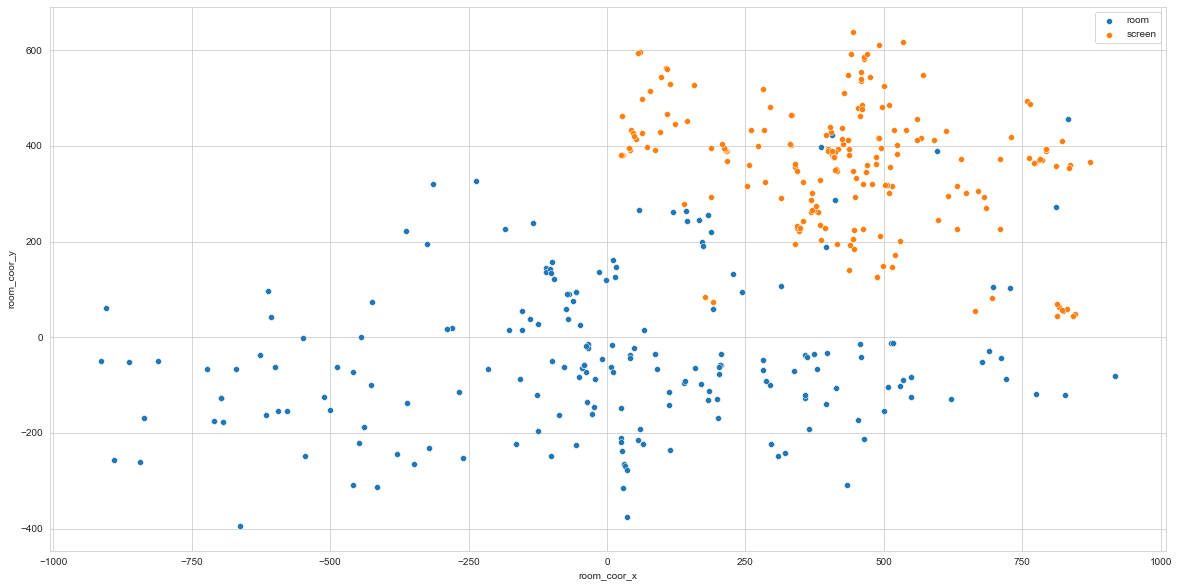

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='room_coor_x', y='room_coor_y',data=train_df[(train_df.session_id==22100221145014656)&(train_df.level_group=='0-4')])
sns.scatterplot(x='screen_coor_x', y='screen_coor_y',data=train_df[(train_df.session_id==22100221145014656)&(train_df.level_group=='0-4')])
plt.legend(['room', 'screen'])

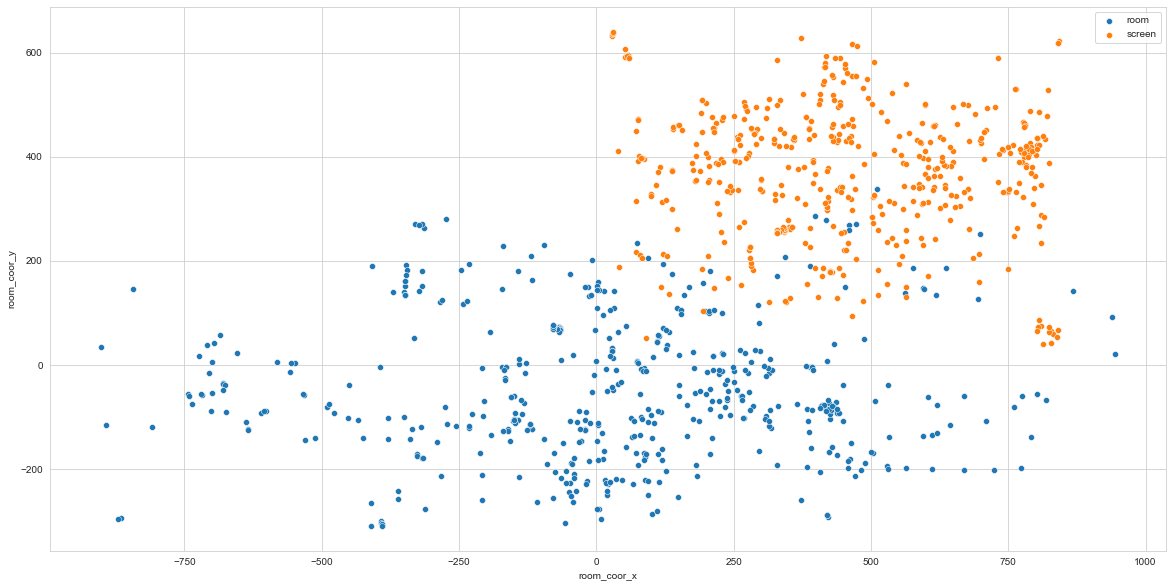

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='room_coor_x', y='room_coor_y',data=train_df[(train_df.session_id==22100221145014656)&(train_df.level_group=='5-12')])
sns.scatterplot(x='screen_coor_x', y='screen_coor_y',data=train_df[(train_df.session_id==22100221145014656)&(train_df.level_group=='5-12')])
plt.legend(['room', 'screen'])

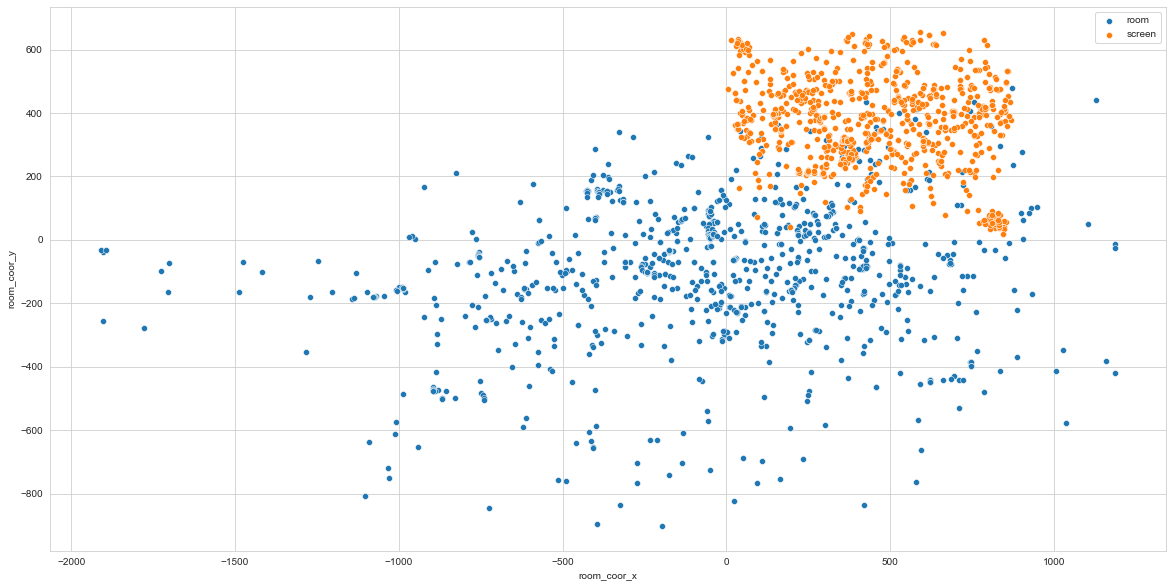

In [18]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='room_coor_x', y='room_coor_y',data=train_df[(train_df.session_id==20090314121766812])
sns.scatterplot(x='screen_coor_x', y='screen_coor_y',data=train_df[train_df.session_id==20090314121766812])
plt.legend(['room', 'screen'])

In [62]:
train_labels[train_labels.session.isin(['22100221145014656','20090312431273200'])].sort_values(['question','session'])

,session_id,correct,question,session
0,20090312431273200_q1,1,q1,20090312431273200
11778,22100221145014656_q1,0,q1,22100221145014656
106011,20090312431273200_q10,1,q10,20090312431273200
117789,22100221145014656_q10,0,q10,22100221145014656
117790,20090312431273200_q11,1,q11,20090312431273200
129568,22100221145014656_q11,1,q11,22100221145014656
129569,20090312431273200_q12,1,q12,20090312431273200
141347,22100221145014656_q12,1,q12,22100221145014656
141348,20090312431273200_q13,0,q13,20090312431273200
153126,22100221145014656_q13,0,q13,22100221145014656


In [70]:
train_labels['session'].unique()

array(['20090312431273200', '20090312433251036', '20090314121766812', ...,
       '22100217104993650', '22100219442786200', '22100221145014656'],
      dtype=object)

In [286]:
train_df.groupby(['session_id','event_name']).size()

session_id         event_name        
20090312431273200  checkpoint              3
                   cutscene_click        100
                   map_click              16
                   map_hover              27
                   navigate_click        354
                                        ... 
22100221145014656  notification_click     24
                   object_click          195
                   object_hover           78
                   observation_click      11
                   person_click          300
Length: 126388, dtype: int64

In [201]:
new_cols = [col[1] for col in list(event_df.columns)]

In [312]:
event_df = pd.pivot_table(train_df[['session_id','event_name']].value_counts().reset_index(),index='session_id',columns=['event_name'],values=0)

In [316]:
train_labels_pivot = pd.pivot_table(train_labels,index='session', columns='question', values='correct')

In [320]:
train_labels_pivot.reset_index(inplace=True)

In [322]:
train_labels_pivot

question,session,q1,q10,q11,q12,q13,q14,q15,q16,q17,q18,q2,q3,q4,q5,q6,q7,q8,q9
0,20090312431273200,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1
1,20090312433251036,0,0,0,1,0,1,0,1,0,1,1,1,1,0,1,1,0,1
2,20090314121766812,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,0,0
3,20090314363702160,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1
4,20090314441803444,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11774,22100215342220508,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
11775,22100215460321130,0,0,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,1
11776,22100217104993650,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1
11777,22100219442786200,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1


In [323]:
event_df.reset_index()

event_name,session_id,checkpoint,cutscene_click,map_click,map_hover,navigate_click,notebook_click,notification_click,object_click,object_hover,observation_click,person_click
0,20090312431273200,3.0,100.0,16.0,27.0,354.0,NaN,27.0,59.0,38.0,8.0,249.0
1,20090312433251036,3.0,112.0,64.0,219.0,801.0,59.0,28.0,172.0,103.0,10.0,260.0
2,20090314121766812,3.0,98.0,18.0,60.0,385.0,62.0,34.0,84.0,59.0,14.0,221.0
3,20090314363702160,3.0,119.0,21.0,50.0,464.0,6.0,23.0,68.0,49.0,6.0,257.0
4,20090314441803444,3.0,97.0,14.0,26.0,271.0,NaN,22.0,74.0,64.0,5.0,213.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11774,22100215342220508,3.0,99.0,16.0,27.0,308.0,20.0,29.0,77.0,55.0,10.0,229.0
11775,22100215460321130,3.0,112.0,25.0,67.0,301.0,21.0,26.0,83.0,53.0,8.0,286.0
11776,22100217104993650,3.0,115.0,18.0,27.0,495.0,67.0,34.0,110.0,52.0,9.0,269.0
11777,22100219442786200,3.0,97.0,18.0,24.0,347.0,50.0,25.0,47.0,34.0,7.0,216.0


In [321]:
event_df['session_id'] = event_df['session_id'].astype('int64')
train_labels_pivot['session'] = train_labels_pivot['session'].astype('int64')

KeyError: 'session_id'

In [202]:
event_df.columns = new_cols

In [214]:
event_df.to_csv('event_df.csv')

In [215]:
event_df=pd.read_csv('event_df.csv')

In [218]:
train_event_df = event_df.merge(train_labels_pivot, how='left', left_on='session_id', right_on='session')

In [227]:
train_event_df.fillna(0,inplace=True)

In [238]:
features = event_df.columns[1:]
targets = ['q' + str(i) for i in range(1,19)]

In [229]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [239]:
X_train, X_valid, y_train, y_valid = train_test_split(train_event_df[features], train_event_df[targets], random_state=42, test_size=0.20)

In [231]:
scaler = MinMaxScaler()
scaler.fit(X_train[features])

MinMaxScaler()

In [240]:
scaled_X_train = scaler.transform(X_train[features])
scaled_X_valid = scaler.transform(X_valid[features])

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

,checkpoint,cutscene_click,map_click,map_hover,navigate_click,notebook_click,notification_click,object_click,object_hover,observation_click,...,cutscene_click.17,map_click.17,map_hover.17,navigate_click.17,notebook_click.17,notification_click.17,object_click.17,object_hover.17,observation_click.17,person_click.17
3692,3.0,95.0,18.0,44.0,373.0,2.0,23.0,67.0,46.0,7.0,...,95.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,7.0,227.0
8724,3.0,120.0,19.0,34.0,286.0,10.0,29.0,75.0,42.0,8.0,...,120.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,8.0,261.0
8703,3.0,125.0,14.0,33.0,777.0,18.0,22.0,53.0,40.0,10.0,...,125.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,10.0,306.0
5676,3.0,125.0,28.0,86.0,522.0,76.0,26.0,65.0,47.0,17.0,...,125.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,17.0,301.0
4207,3.0,99.0,33.0,82.0,520.0,39.0,22.0,82.0,49.0,5.0,...,99.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,5.0,217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,3.0,96.0,18.0,17.0,371.0,2.0,28.0,61.0,34.0,11.0,...,96.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,11.0,229.0
5191,3.0,124.0,19.0,29.0,313.0,21.0,34.0,74.0,62.0,9.0,...,124.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,9.0,256.0
5390,3.0,103.0,22.0,55.0,458.0,59.0,26.0,152.0,51.0,7.0,...,103.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,7.0,244.0
860,3.0,114.0,14.0,18.0,191.0,38.0,31.0,47.0,29.0,7.0,...,114.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,7.0,256.0


In [263]:
res = {}
models = {}
for col in y_train:
    print(col)
    model = LogisticRegression(class_weight='balanced')
    model.fit(scaled_X_train, y_train[col])
    res[col] =  model.predict(scaled_X_valid)
    models[col] = model

q1
q2
q3
q4
q5
q6
q7
q8
q9
q10
q11
q12
q13
q14
q15
q16
q17
q18


In [250]:
res = pd.DataFrame(res)

In [253]:
y_valid.reset_index(inplace=True,drop=True)

In [254]:
y_valid

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18
0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,1,1
2,1,1,1,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1
3,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,0,1
4,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1
2352,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1
2353,1,1,1,1,1,0,1,1,0,0,0,1,0,1,0,0,0,1
2354,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,1,1,1


In [259]:
f1_score(pd.melt(y_valid,value_vars=targets)['value'],pd.melt(res,value_vars=targets)['value'])

0.7523360450455118

In [258]:
pd.melt(y_valid,value_vars=targets)

,variable,value
0,q1,1
1,q1,1
2,q1,1
3,q1,1
4,q1,0
...,...,...
42403,q18,1
42404,q18,1
42405,q18,1
42406,q18,1


In [260]:
test_df

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4,20090109393214576_0-4
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,20090312331414616,1001,1581679,map_hover,basic,22,NaN,NaN,NaN,NaN,...,484.0,NaN,tunic.wildlife,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,13-22,20090312331414616_13-22
3724,20090312331414616,1002,1583044,map_hover,basic,22,NaN,NaN,NaN,NaN,...,783.0,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,13-22,20090312331414616_13-22
3725,20090312331414616,1003,1583410,map_click,undefined,22,NaN,483.726363,-3.880047,456.0,...,NaN,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,13-22,20090312331414616_13-22
3726,20090312331414616,1004,1585841,navigate_click,undefined,22,NaN,192.372139,38.216178,383.0,...,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22,20090312331414616_13-22


In [305]:
import gc

In [307]:
test_event_df

event_name,checkpoint,cutscene_click,map_click,map_hover,navigate_click,notebook_click,notification_click,object_click,object_hover,observation_click,person_click
session_id,,,,,,,,,,,
20090109393214576,3,116,16,39,432,54,24,224,60,9,285
20090312143683264,3,104,27,55,752,56,26,151,77,17,233
20090312331414616,3,96,18,55,335,43,26,96,67,8,218


In [308]:
test_event_df.fillna(0, inplace=True)

In [311]:
features

Index(['checkpoint', 'cutscene_click', 'map_click', 'map_hover',
       'navigate_click', 'notebook_click', 'notification_click',
       'object_click', 'object_hover', 'observation_click',
       ...
       'cutscene_click.17', 'map_click.17', 'map_hover.17',
       'navigate_click.17', 'notebook_click.17', 'notification_click.17',
       'object_click.17', 'object_hover.17', 'observation_click.17',
       'person_click.17'],
      dtype='object', length=198)

In [309]:
X_test = scaler.transform(test_event_df[features])
for k,v in models.items():
    test_event_df[k] = models[k].predict(X_test)

KeyError: "['checkpoint.1', 'cutscene_click.1', 'map_click.1', 'map_hover.1', 'navigate_click.1', 'notebook_click.1', 'notification_click.1', 'object_click.1', 'object_hover.1', 'observation_click.1', 'person_click.1', 'checkpoint.2', 'cutscene_click.2', 'map_click.2', 'map_hover.2', 'navigate_click.2', 'notebook_click.2', 'notification_click.2', 'object_click.2', 'object_hover.2', 'observation_click.2', 'person_click.2', 'checkpoint.3', 'cutscene_click.3', 'map_click.3', 'map_hover.3', 'navigate_click.3', 'notebook_click.3', 'notification_click.3', 'object_click.3', 'object_hover.3', 'observation_click.3', 'person_click.3', 'checkpoint.4', 'cutscene_click.4', 'map_click.4', 'map_hover.4', 'navigate_click.4', 'notebook_click.4', 'notification_click.4', 'object_click.4', 'object_hover.4', 'observation_click.4', 'person_click.4', 'checkpoint.5', 'cutscene_click.5', 'map_click.5', 'map_hover.5', 'navigate_click.5', 'notebook_click.5', 'notification_click.5', 'object_click.5', 'object_hover.5', 'observation_click.5', 'person_click.5', 'checkpoint.6', 'cutscene_click.6', 'map_click.6', 'map_hover.6', 'navigate_click.6', 'notebook_click.6', 'notification_click.6', 'object_click.6', 'object_hover.6', 'observation_click.6', 'person_click.6', 'checkpoint.7', 'cutscene_click.7', 'map_click.7', 'map_hover.7', 'navigate_click.7', 'notebook_click.7', 'notification_click.7', 'object_click.7', 'object_hover.7', 'observation_click.7', 'person_click.7', 'checkpoint.8', 'cutscene_click.8', 'map_click.8', 'map_hover.8', 'navigate_click.8', 'notebook_click.8', 'notification_click.8', 'object_click.8', 'object_hover.8', 'observation_click.8', 'person_click.8', 'checkpoint.9', 'cutscene_click.9', 'map_click.9', 'map_hover.9', 'navigate_click.9', 'notebook_click.9', 'notification_click.9', 'object_click.9', 'object_hover.9', 'observation_click.9', 'person_click.9', 'checkpoint.10', 'cutscene_click.10', 'map_click.10', 'map_hover.10', 'navigate_click.10', 'notebook_click.10', 'notification_click.10', 'object_click.10', 'object_hover.10', 'observation_click.10', 'person_click.10', 'checkpoint.11', 'cutscene_click.11', 'map_click.11', 'map_hover.11', 'navigate_click.11', 'notebook_click.11', 'notification_click.11', 'object_click.11', 'object_hover.11', 'observation_click.11', 'person_click.11', 'checkpoint.12', 'cutscene_click.12', 'map_click.12', 'map_hover.12', 'navigate_click.12', 'notebook_click.12', 'notification_click.12', 'object_click.12', 'object_hover.12', 'observation_click.12', 'person_click.12', 'checkpoint.13', 'cutscene_click.13', 'map_click.13', 'map_hover.13', 'navigate_click.13', 'notebook_click.13', 'notification_click.13', 'object_click.13', 'object_hover.13', 'observation_click.13', 'person_click.13', 'checkpoint.14', 'cutscene_click.14', 'map_click.14', 'map_hover.14', 'navigate_click.14', 'notebook_click.14', 'notification_click.14', 'object_click.14', 'object_hover.14', 'observation_click.14', 'person_click.14', 'checkpoint.15', 'cutscene_click.15', 'map_click.15', 'map_hover.15', 'navigate_click.15', 'notebook_click.15', 'notification_click.15', 'object_click.15', 'object_hover.15', 'observation_click.15', 'person_click.15', 'checkpoint.16', 'cutscene_click.16', 'map_click.16', 'map_hover.16', 'navigate_click.16', 'notebook_click.16', 'notification_click.16', 'object_click.16', 'object_hover.16', 'observation_click.16', 'person_click.16', 'checkpoint.17', 'cutscene_click.17', 'map_click.17', 'map_hover.17', 'navigate_click.17', 'notebook_click.17', 'notification_click.17', 'object_click.17', 'object_hover.17', 'observation_click.17', 'person_click.17'] not in index"

In [306]:
test_event_df = pd.pivot_table(test_df[['session_id','event_name']].value_counts().reset_index(),index='session_id',columns=['event_name'],values=0)
test_event_df.fillna(0, inplace=True)
X_test = scaler.transform(test_event_df[features])
for k,v in models.items():
    test_event_df[k] = models[k].predict(X_test)
del X_test
gc.collect()
output = pd.melt(test_event_df.reset_index(),id_vars='session_id',value_vars=targets,value_name='correct')
print(output)
output['session_id'] = output['session_id'].astype('str')+'_'+output['variable']

KeyError: "['checkpoint.1', 'cutscene_click.1', 'map_click.1', 'map_hover.1', 'navigate_click.1', 'notebook_click.1', 'notification_click.1', 'object_click.1', 'object_hover.1', 'observation_click.1', 'person_click.1', 'checkpoint.2', 'cutscene_click.2', 'map_click.2', 'map_hover.2', 'navigate_click.2', 'notebook_click.2', 'notification_click.2', 'object_click.2', 'object_hover.2', 'observation_click.2', 'person_click.2', 'checkpoint.3', 'cutscene_click.3', 'map_click.3', 'map_hover.3', 'navigate_click.3', 'notebook_click.3', 'notification_click.3', 'object_click.3', 'object_hover.3', 'observation_click.3', 'person_click.3', 'checkpoint.4', 'cutscene_click.4', 'map_click.4', 'map_hover.4', 'navigate_click.4', 'notebook_click.4', 'notification_click.4', 'object_click.4', 'object_hover.4', 'observation_click.4', 'person_click.4', 'checkpoint.5', 'cutscene_click.5', 'map_click.5', 'map_hover.5', 'navigate_click.5', 'notebook_click.5', 'notification_click.5', 'object_click.5', 'object_hover.5', 'observation_click.5', 'person_click.5', 'checkpoint.6', 'cutscene_click.6', 'map_click.6', 'map_hover.6', 'navigate_click.6', 'notebook_click.6', 'notification_click.6', 'object_click.6', 'object_hover.6', 'observation_click.6', 'person_click.6', 'checkpoint.7', 'cutscene_click.7', 'map_click.7', 'map_hover.7', 'navigate_click.7', 'notebook_click.7', 'notification_click.7', 'object_click.7', 'object_hover.7', 'observation_click.7', 'person_click.7', 'checkpoint.8', 'cutscene_click.8', 'map_click.8', 'map_hover.8', 'navigate_click.8', 'notebook_click.8', 'notification_click.8', 'object_click.8', 'object_hover.8', 'observation_click.8', 'person_click.8', 'checkpoint.9', 'cutscene_click.9', 'map_click.9', 'map_hover.9', 'navigate_click.9', 'notebook_click.9', 'notification_click.9', 'object_click.9', 'object_hover.9', 'observation_click.9', 'person_click.9', 'checkpoint.10', 'cutscene_click.10', 'map_click.10', 'map_hover.10', 'navigate_click.10', 'notebook_click.10', 'notification_click.10', 'object_click.10', 'object_hover.10', 'observation_click.10', 'person_click.10', 'checkpoint.11', 'cutscene_click.11', 'map_click.11', 'map_hover.11', 'navigate_click.11', 'notebook_click.11', 'notification_click.11', 'object_click.11', 'object_hover.11', 'observation_click.11', 'person_click.11', 'checkpoint.12', 'cutscene_click.12', 'map_click.12', 'map_hover.12', 'navigate_click.12', 'notebook_click.12', 'notification_click.12', 'object_click.12', 'object_hover.12', 'observation_click.12', 'person_click.12', 'checkpoint.13', 'cutscene_click.13', 'map_click.13', 'map_hover.13', 'navigate_click.13', 'notebook_click.13', 'notification_click.13', 'object_click.13', 'object_hover.13', 'observation_click.13', 'person_click.13', 'checkpoint.14', 'cutscene_click.14', 'map_click.14', 'map_hover.14', 'navigate_click.14', 'notebook_click.14', 'notification_click.14', 'object_click.14', 'object_hover.14', 'observation_click.14', 'person_click.14', 'checkpoint.15', 'cutscene_click.15', 'map_click.15', 'map_hover.15', 'navigate_click.15', 'notebook_click.15', 'notification_click.15', 'object_click.15', 'object_hover.15', 'observation_click.15', 'person_click.15', 'checkpoint.16', 'cutscene_click.16', 'map_click.16', 'map_hover.16', 'navigate_click.16', 'notebook_click.16', 'notification_click.16', 'object_click.16', 'object_hover.16', 'observation_click.16', 'person_click.16', 'checkpoint.17', 'cutscene_click.17', 'map_click.17', 'map_hover.17', 'navigate_click.17', 'notebook_click.17', 'notification_click.17', 'object_click.17', 'object_hover.17', 'observation_click.17', 'person_click.17'] not in index"

In [265]:
test_event_df.fillna(0,inplace=True)

In [267]:
scaler.transform(test_event_df[features])

KeyError: "Index(['checkpoint', 'cutscene_click', 'map_click', 'map_hover',\n       'navigate_click', 'notebook_click', 'notification_click',\n       'object_click', 'object_hover', 'observation_click',\n       ...\n       'cutscene_click.17', 'map_click.17', 'map_hover.17',\n       'navigate_click.17', 'notebook_click.17', 'notification_click.17',\n       'object_click.17', 'object_hover.17', 'observation_click.17',\n       'person_click.17'],\n      dtype='object', length=198) not in index"

In [272]:
test_event_df.columns = [col[1] for col in list(test_event_df.columns)]

In [276]:
test_event_df[features]

KeyError: "['checkpoint.1', 'cutscene_click.1', 'map_click.1', 'map_hover.1', 'navigate_click.1', 'notebook_click.1', 'notification_click.1', 'object_click.1', 'object_hover.1', 'observation_click.1', 'person_click.1', 'checkpoint.2', 'cutscene_click.2', 'map_click.2', 'map_hover.2', 'navigate_click.2', 'notebook_click.2', 'notification_click.2', 'object_click.2', 'object_hover.2', 'observation_click.2', 'person_click.2', 'checkpoint.3', 'cutscene_click.3', 'map_click.3', 'map_hover.3', 'navigate_click.3', 'notebook_click.3', 'notification_click.3', 'object_click.3', 'object_hover.3', 'observation_click.3', 'person_click.3', 'checkpoint.4', 'cutscene_click.4', 'map_click.4', 'map_hover.4', 'navigate_click.4', 'notebook_click.4', 'notification_click.4', 'object_click.4', 'object_hover.4', 'observation_click.4', 'person_click.4', 'checkpoint.5', 'cutscene_click.5', 'map_click.5', 'map_hover.5', 'navigate_click.5', 'notebook_click.5', 'notification_click.5', 'object_click.5', 'object_hover.5', 'observation_click.5', 'person_click.5', 'checkpoint.6', 'cutscene_click.6', 'map_click.6', 'map_hover.6', 'navigate_click.6', 'notebook_click.6', 'notification_click.6', 'object_click.6', 'object_hover.6', 'observation_click.6', 'person_click.6', 'checkpoint.7', 'cutscene_click.7', 'map_click.7', 'map_hover.7', 'navigate_click.7', 'notebook_click.7', 'notification_click.7', 'object_click.7', 'object_hover.7', 'observation_click.7', 'person_click.7', 'checkpoint.8', 'cutscene_click.8', 'map_click.8', 'map_hover.8', 'navigate_click.8', 'notebook_click.8', 'notification_click.8', 'object_click.8', 'object_hover.8', 'observation_click.8', 'person_click.8', 'checkpoint.9', 'cutscene_click.9', 'map_click.9', 'map_hover.9', 'navigate_click.9', 'notebook_click.9', 'notification_click.9', 'object_click.9', 'object_hover.9', 'observation_click.9', 'person_click.9', 'checkpoint.10', 'cutscene_click.10', 'map_click.10', 'map_hover.10', 'navigate_click.10', 'notebook_click.10', 'notification_click.10', 'object_click.10', 'object_hover.10', 'observation_click.10', 'person_click.10', 'checkpoint.11', 'cutscene_click.11', 'map_click.11', 'map_hover.11', 'navigate_click.11', 'notebook_click.11', 'notification_click.11', 'object_click.11', 'object_hover.11', 'observation_click.11', 'person_click.11', 'checkpoint.12', 'cutscene_click.12', 'map_click.12', 'map_hover.12', 'navigate_click.12', 'notebook_click.12', 'notification_click.12', 'object_click.12', 'object_hover.12', 'observation_click.12', 'person_click.12', 'checkpoint.13', 'cutscene_click.13', 'map_click.13', 'map_hover.13', 'navigate_click.13', 'notebook_click.13', 'notification_click.13', 'object_click.13', 'object_hover.13', 'observation_click.13', 'person_click.13', 'checkpoint.14', 'cutscene_click.14', 'map_click.14', 'map_hover.14', 'navigate_click.14', 'notebook_click.14', 'notification_click.14', 'object_click.14', 'object_hover.14', 'observation_click.14', 'person_click.14', 'checkpoint.15', 'cutscene_click.15', 'map_click.15', 'map_hover.15', 'navigate_click.15', 'notebook_click.15', 'notification_click.15', 'object_click.15', 'object_hover.15', 'observation_click.15', 'person_click.15', 'checkpoint.16', 'cutscene_click.16', 'map_click.16', 'map_hover.16', 'navigate_click.16', 'notebook_click.16', 'notification_click.16', 'object_click.16', 'object_hover.16', 'observation_click.16', 'person_click.16', 'checkpoint.17', 'cutscene_click.17', 'map_click.17', 'map_hover.17', 'navigate_click.17', 'notebook_click.17', 'notification_click.17', 'object_click.17', 'object_hover.17', 'observation_click.17', 'person_click.17'] not in index"

In [277]:
features

Index(['checkpoint', 'cutscene_click', 'map_click', 'map_hover',
       'navigate_click', 'notebook_click', 'notification_click',
       'object_click', 'object_hover', 'observation_click',
       ...
       'cutscene_click.17', 'map_click.17', 'map_hover.17',
       'navigate_click.17', 'notebook_click.17', 'notification_click.17',
       'object_click.17', 'object_hover.17', 'observation_click.17',
       'person_click.17'],
      dtype='object', length=198)

In [279]:
train_df['event_name'].unique()

array(['cutscene_click', 'person_click', 'navigate_click',
       'observation_click', 'notification_click', 'object_click',
       'object_hover', 'map_hover', 'map_click', 'checkpoint',
       'notebook_click'], dtype=object)

In [281]:
event_df

,session_id,checkpoint,cutscene_click,map_click,map_hover,navigate_click,notebook_click,notification_click,object_click,object_hover,...,cutscene_click.17,map_click.17,map_hover.17,navigate_click.17,notebook_click.17,notification_click.17,object_click.17,object_hover.17,observation_click.17,person_click.17
0,20090312431273200,3.0,100.0,16.0,27.0,354.0,NaN,27.0,59.0,38.0,...,100.0,0.0,0.0,0.0,NaN,27.0,0.0,0.0,8.0,249.0
1,20090312433251036,3.0,112.0,64.0,219.0,801.0,59.0,28.0,172.0,103.0,...,112.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,10.0,260.0
2,20090314121766812,3.0,98.0,18.0,60.0,385.0,62.0,34.0,84.0,59.0,...,98.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,14.0,221.0
3,20090314363702160,3.0,119.0,21.0,50.0,464.0,6.0,23.0,68.0,49.0,...,119.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,6.0,257.0
4,20090314441803444,3.0,97.0,14.0,26.0,271.0,NaN,22.0,74.0,64.0,...,97.0,0.0,0.0,0.0,NaN,22.0,0.0,0.0,5.0,213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11774,22100215342220508,3.0,99.0,16.0,27.0,308.0,20.0,29.0,77.0,55.0,...,99.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,10.0,229.0
11775,22100215460321130,3.0,112.0,25.0,67.0,301.0,21.0,26.0,83.0,53.0,...,112.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,8.0,286.0
11776,22100217104993650,3.0,115.0,18.0,27.0,495.0,67.0,34.0,110.0,52.0,...,115.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,9.0,269.0
11777,22100219442786200,3.0,97.0,18.0,24.0,347.0,50.0,25.0,47.0,34.0,...,97.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,7.0,216.0


In [324]:
try:
    5 / 0
    p = 1
except:
    p = 2
p

2

In [283]:
pd.pivot_table(train_df, index='session_id', columns='event_name',aggfunc='count')

elapsed_time                                     \
event_name          checkpoint cutscene_click map_click map_hover   
session_id                                                          
20090312431273200          3.0          100.0      16.0      27.0   
20090312433251036          3.0          112.0      64.0     219.0   
20090314121766812          3.0           98.0      18.0      60.0   
20090314363702160          3.0          119.0      21.0      50.0   
20090314441803444          3.0           97.0      14.0      26.0   
...                        ...            ...       ...       ...   
22100215342220508          3.0           99.0      16.0      27.0   
22100215460321130          3.0          112.0      25.0      67.0   
22100217104993650          3.0          115.0      18.0      27.0   
22100219442786200          3.0           97.0      18.0      24.0   
22100221145014656          3.0          119.0      28.0      79.0   

                                                                    \
event_name        navigate_click notebook_click notification_click   
session_id                                                           
20090312431273200          354.0            NaN               27.0   
20090312433251036          801.0           59.0               28.0   
20090314121766812          385.0           62.0               34.0   
20090314363702160          464.0            6.0               23.0   
20090314441803444          271.0            NaN               22.0   
...                          ...            ...                ...   
22100215342220508          308.0           20.0               29.0   
22100215460321130          301.0           21.0               26.0   
22100217104993650          495.0           67.0               34.0   
22100219442786200          347.0           50.0               25.0   
22100221145014656          660.0           50.0               24.0   

                                                               ...  \
event_name        object_click object_hover observation_click  ...   
session_id                                                     ...   
20090312431273200         59.0         38.0               8.0  ...   
20090312433251036        172.0        103.0              10.0  ...   
20090314121766812         84.0         59.0              14.0  ...   
20090314363702160         68.0         49.0               6.0  ...   
20090314441803444         74.0         64.0               5.0  ...   
...                        ...          ...               ...  ...   
22100215342220508         77.0         55.0              10.0  ...   
22100215460321130         83.0         53.0               8.0  ...   
22100217104993650        110.0         52.0               9.0  ...   
22100219442786200         47.0         34.0               7.0  ...   
22100221145014656        195.0         78.0              11.0  ...   

                       text_fqid                                     \
event_name        cutscene_click map_click map_hover navigate_click   
session_id                                                            
20090312431273200          100.0       0.0       0.0            0.0   
20090312433251036          112.0       0.0       0.0            0.0   
20090314121766812           98.0       0.0       0.0            0.0   
20090314363702160          119.0       0.0       0.0            0.0   
20090314441803444           97.0       0.0       0.0            0.0   
...                          ...       ...       ...            ...   
22100215342220508           99.0       0.0       0.0            0.0   
22100215460321130          112.0       0.0       0.0            0.0   
22100217104993650          115.0       0.0       0.0            0.0   
22100219442786200           97.0       0.0       0.0            0.0   
22100221145014656          119.0       0.0       0.0            0.0   

                                                                               \
event_name   

In [285]:
train_df.groupby(['session_id','event_name']).sum()

index  elapsed_time  level  page  \
session_id        event_name                                              
20090312431273200 checkpoint            1565       1966774     38   0.0   
                  cutscene_click       41275      60736305   1036   0.0   
                  map_click             7735       9939283    189   0.0   
                  map_hover            13597      18364921    332   0.0   
                  navigate_click      157290     215480258   3898   0.0   
...                                      ...           ...    ...   ...   
22100221145014656 notification_click   15221      61015135    216   0.0   
                  object_click        146430     599260084   2133   0.0   
                  object_hover         61823     247199579    896   0.0   
                  observation_click     5670      23610009     89   0.0   
                  person_click        240887     927514681   3657   0.0   

                                       room_coor_x   room_coor_y  \
session_id        event_name                                       
20090312431273200 checkpoint              0.000000      0.000000   
                  cutscene_click     -22367.856661  -7428.566863   
                  map_click            4597.328503    422.849423   
                  map_hover               0.000000      0.000000   
                  navigate_click     -37416.543484 -43043.400620   
...                                            ...           ...   
22100221145014656 notification_click    190.581246  -2881.998860   
                  object_click        53643.917658 -14385.333678   
                  object_hover            0.000000      0.000000   
                  observation_click     907.715712  -1391.301012   
                  person_click       -32684.905272 -30691.725684   

                                      screen_coor_x  screen_coor_y  \
session_id        event_name                                         
20090312431273200 checkpoint                    0.0            0.0   
                  cutscene_click            36985.0        38688.0   
                  map_click                  8223.0         4510.0   
                  map_hover                     0.0            0.0   
                  navigate_click           158059.0       140102.0   
...                                             ...            ...   
22100221145014656 notification_click        10594.0        10137.0   
                  object_click             108152.0        67519.0   
                  object_hover                  0.0            0.0   
                  observation_click          4884.0         3977.0   
                  person_click             116325.0       104670.0   

                                      hover_duration  fullscreen   hq  music  
session_id        event_name                                                  
20090312431273200 checkpoint                     0.0         0.0  0.0    0.0  
                  cutscene_click                 0.0         0.0  0.0    0.0  
                  map_click                      0.0         0.0  0.0    0.0  
                  map_hover                   6649.0         0.0  0.0    0.0  
                  navigate_click                 0.0         0.0  0.0    0.0  
...                                              ...         ...  ...    ...  
22100221145014656 notification_click             0.0         0.0  0.0    0.0  
                  object_click                   0.0         0.0  0.0    0.0  
                  object_hover              186569.0         0.0  0.0    0.0  
                  observation_click              0.0         0.0  0.0    0.0  
                  person_click                   0.0         0.0  0.0    0.0  

[126388 rows x 12 columns]

In [297]:
pd.pivot_table(test_df[['session_id','event_name']],index='session_id',columns=['event_name'],values='event_name',aggfunc='count')

event_name
session_id
20090109393214576
20090312143683264
20090312331414616


In [303]:
pd.pivot_table(test_df[['session_id','event_name']].value_counts().reset_index(),index='session_id',columns=['event_name'],values=0)

event_name,checkpoint,cutscene_click,map_click,map_hover,navigate_click,notebook_click,notification_click,object_click,object_hover,observation_click,person_click
session_id,,,,,,,,,,,
20090109393214576,3,116,16,39,432,54,24,224,60,9,285
20090312143683264,3,104,27,55,752,56,26,151,77,17,233
20090312331414616,3,96,18,55,335,43,26,96,67,8,218


In [302]:
test_df[['session_id','event_name']].value_counts().reset_index()

,session_id,event_name,0
0,20090312143683264,navigate_click,752
1,20090109393214576,navigate_click,432
2,20090312331414616,navigate_click,335
3,20090109393214576,person_click,285
4,20090312143683264,person_click,233
5,20090109393214576,object_click,224
6,20090312331414616,person_click,218
7,20090312143683264,object_click,151
8,20090109393214576,cutscene_click,116
9,20090312143683264,cutscene_click,104
